# Speech-based-stress-detection-using-a-cross-modal-transfer-learning-approach: Generating images from audio files

In [1]:
from IPython.display import Audio
import librosa
import glob
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
SAMPLE_RATE = 16000
FILENAME = 'ID_852630991_baseline.wav'

## Selecting an example file

In [7]:
example_file = (FILENAME, FILENAME.split('.')[0])
example_file

('ID_852630991_baseline.wav', 'ID_852630991_baseline')

## Loading an audio file

In [8]:
clip, sample_rate = librosa.load(example_file[0], sr=SAMPLE_RATE)

print('Sample Rate   {} Hz'.format(sample_rate))
print('Clip Length   {:3.2f} seconds'.format(len(clip)/sample_rate))

Sample Rate   16000 Hz
Clip Length   112.00 seconds


## Plotting audio data

In [9]:
n_chunk = 10
clip_one_second = clip[n_chunk*sample_rate:(n_chunk+1)*sample_rate]

Text(0.5, 1.0, 'One second chunk: ID_852630991_baseline (16000 samples)')

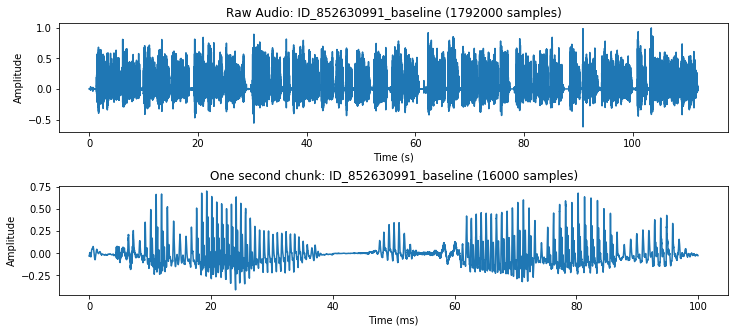

In [10]:
fig, ax = plt.subplots(2, figsize=(12, 5))
fig.subplots_adjust(hspace=0.5)

# plot the entire clip 
timesteps = np.arange(len(clip)) / sample_rate  # in seconds
ax[0].plot(timesteps, clip)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Raw Audio: {} ({} samples)'.format(example_file[1], len(clip)))

# plot the one second clip 
timesteps = np.arange(len(clip_one_second)) * 100.0 / sample_rate  # in miliseconds
ax[1].plot(timesteps, clip_one_second)
ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('One second chunk: {} ({} samples)'.format(example_file[1], len(clip_one_second)))


## Generating the spectrogram

We check the trade-off between time and frequency resolution. The greater the n_fft, the lower the time resolution.

513 rows, 32 columns = 16.03125


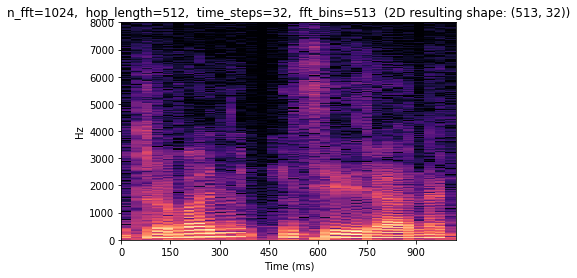

In [11]:
n_fft = 1024 # freq resolution
hop_length = int(n_fft/2)
stft = librosa.stft(clip_one_second, n_fft=n_fft, hop_length=hop_length)
stft_magnitude, stft_phase = librosa.magphase(stft)
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

fig_ratio = stft_magnitude_db.shape[0]/stft_magnitude_db.shape[1]
print(f'{stft_magnitude_db.shape[0]} rows, {stft_magnitude_db.shape[1]} columns = {fig_ratio}')

librosa.display.specshow(stft_magnitude_db, x_axis='ms', y_axis='linear', 
                         sr=sample_rate, hop_length=hop_length)


title = 'n_fft={},  hop_length={},  time_steps={},  fft_bins={}  (2D resulting shape: {})'
plt.title(title.format(n_fft, hop_length, 
                       stft_magnitude_db.shape[1], 
                       stft_magnitude_db.shape[0], 
                       stft_magnitude_db.shape));

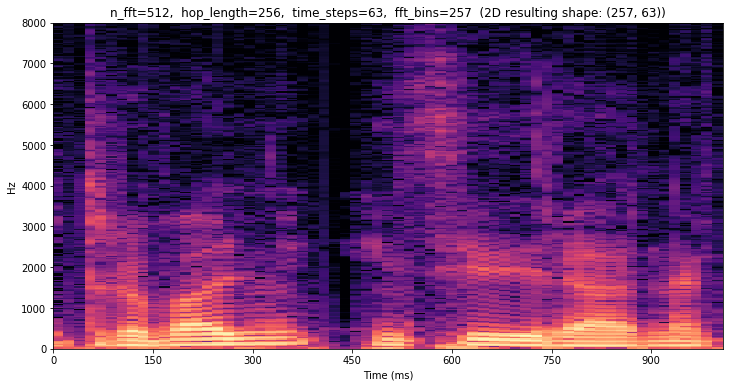

In [12]:
n_fft = 512 # freq resolution
hop_length = int(n_fft/2)
stft = librosa.stft(clip_one_second, n_fft=n_fft, hop_length=hop_length)
stft_magnitude, stft_phase = librosa.magphase(stft)
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_magnitude_db, x_axis='ms', y_axis='linear', 
                         sr=sample_rate, hop_length=hop_length)

title = 'n_fft={},  hop_length={},  time_steps={},  fft_bins={}  (2D resulting shape: {})'
plt.title(title.format(n_fft, hop_length, 
                       stft_magnitude_db.shape[1], 
                       stft_magnitude_db.shape[0], 
                       stft_magnitude_db.shape));

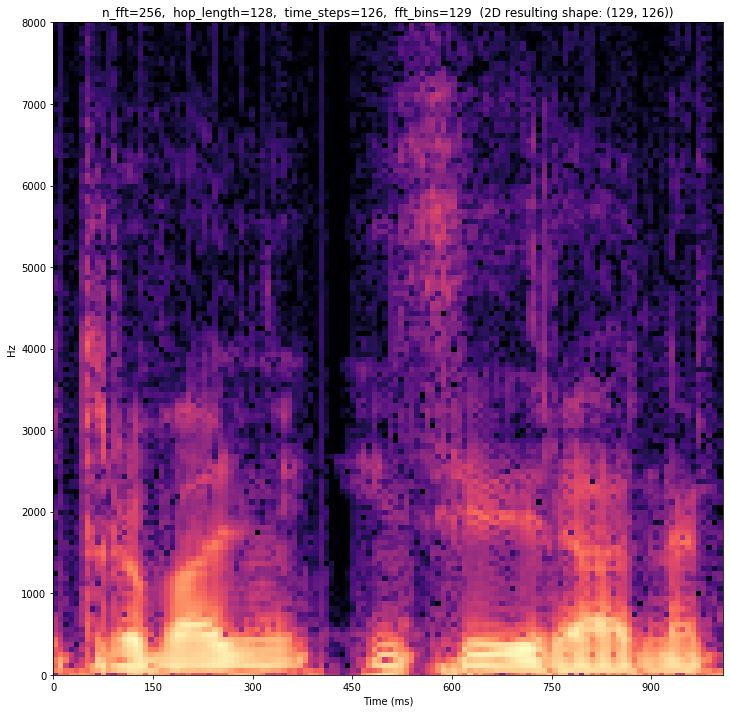

In [13]:
n_fft = 256 # freq resolution
hop_length = int(n_fft/2)
stft = librosa.stft(clip_one_second, n_fft=n_fft, hop_length=hop_length)
stft_magnitude, stft_phase = librosa.magphase(stft)
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

plt.figure(figsize=(12, 12))
librosa.display.specshow(stft_magnitude_db, x_axis='ms', y_axis='linear', 
                         sr=sample_rate, hop_length=hop_length)

title = 'n_fft={},  hop_length={},  time_steps={},  fft_bins={}  (2D resulting shape: {})'
plt.title(title.format(n_fft, hop_length, 
                       stft_magnitude_db.shape[1], 
                       stft_magnitude_db.shape[0], 
                       stft_magnitude_db.shape));

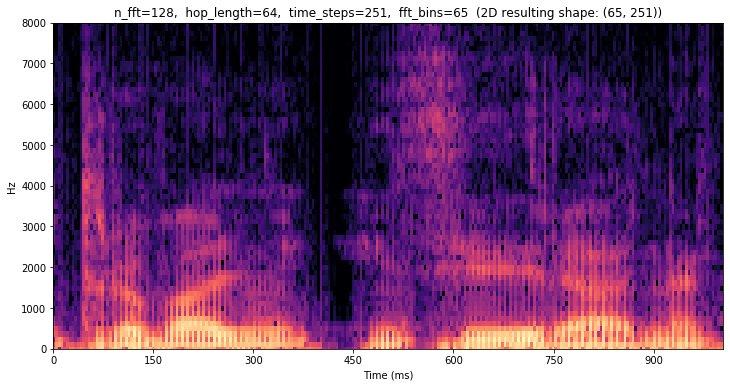

In [14]:
n_fft = 128 # freq resolution
hop_length = int(n_fft/2)
stft = librosa.stft(clip_one_second, n_fft=n_fft, hop_length=hop_length)
stft_magnitude, stft_phase = librosa.magphase(stft)
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_magnitude_db, x_axis='ms', y_axis='linear', 
                         sr=sample_rate, hop_length=hop_length)

title = 'n_fft={},  hop_length={},  time_steps={},  fft_bins={}  (2D resulting shape: {})'
plt.title(title.format(n_fft, hop_length, 
                       stft_magnitude_db.shape[1], 
                       stft_magnitude_db.shape[0], 
                       stft_magnitude_db.shape));

## PLOT PAPER

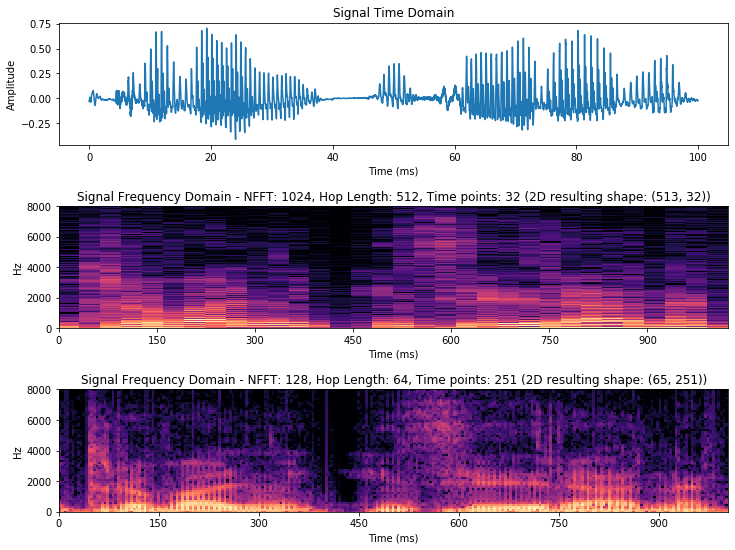

In [28]:
fig, ax = plt.subplots(3, figsize=(12, 9))
fig.subplots_adjust(hspace=0.5)

# plot the one second clip 
timesteps = np.arange(len(clip_one_second)) * 100.0 / sample_rate  # in miliseconds
ax[0].plot(timesteps, clip_one_second)
ax[0].set_xlabel('Time (ms)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Signal Time Domain')


#spectrg
n_fft = 1024 # freq resolution
hop_length = int(n_fft/2)
stft = librosa.stft(clip_one_second, n_fft=n_fft, hop_length=hop_length)
stft_magnitude, stft_phase = librosa.magphase(stft)
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)


plt.subplot(3,1,2)

librosa.display.specshow(stft_magnitude_db, x_axis='ms', y_axis='linear', 
                         sr=sample_rate, hop_length=hop_length)

#title = 'n_fft={},  hop_length={},  time_steps={},  fft_bins={}  (2D resulting shape: {})'
title = 'Signal Frequency Domain - NFFT: {}, Hop Length: {}, Time points: {} (2D resulting shape: {})'
plt.title(title.format(n_fft, 
                       hop_length, 
                       stft_magnitude_db.shape[1], 
                       stft_magnitude_db.shape));


plt.subplot(3,1,3)

#spectrg
n_fft = 128 # freq resolution
hop_length = int(n_fft/2)
stft = librosa.stft(clip_one_second, n_fft=n_fft, hop_length=hop_length)
stft_magnitude, stft_phase = librosa.magphase(stft)
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)


librosa.display.specshow(stft_magnitude_db, x_axis='ms', y_axis='linear', 
                         sr=sample_rate, hop_length=hop_length)

title = 'Signal Frequency Domain - NFFT: {}, Hop Length: {}, Time points: {} (2D resulting shape: {})'
plt.title(title.format(n_fft, 
                       hop_length, 
                       stft_magnitude_db.shape[1], 
                       stft_magnitude_db.shape));

plt.savefig('plot1.png')

## Generating the melspectrogram

In [ ]:
half_second_clip = clip_one_second[0:8000]
half_second_clip.shape

In [ ]:
n_mels = 224  # number of Mel bands to generate
n_fft = 1024 # freq resolution
hop_length = int(n_fft/2)

fmin = 50           
fmax = sample_rate/2
mel_spec = librosa.feature.melspectrogram(clip_one_second, n_fft=n_fft, hop_length=hop_length,
                                          n_mels=n_mels, sr=sample_rate, power=1.0,
                                          fmin=fmin, fmax=fmax)

mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
print(mel_spec_db.shape)


w, h = plt.figaspect(mel_spec_db.shape[0]/mel_spec_db.shape[1])
fig = plt.figure(figsize=(w, h))


librosa.display.specshow(mel_spec_db, x_axis='ms',  y_axis='mel', 
                         sr=sample_rate, hop_length=hop_length, 
                         fmin=fmin, fmax=fmax)

title = 'n_mels={}, fmin={}, fmax={} time_steps={},  fft_bins={}  (2D resulting shape: {})'
plt.title(title.format(n_mels, fmin, fmax, mel_spec_db.shape[1], mel_spec_db.shape[0], mel_spec_db.shape));


## Saving an image for training the model

In [ ]:
from PIL import Image

def matrix_2_RGB_image(x, filename, show=False):
    # Normalization between (0,1) range
    xmax, xmin = x.max(), x.min()
    x_norm = (x - xmin)/(xmax - xmin)
    
    im = Image.fromarray(np.uint8(plt.cm.inferno(x_norm)*255)).convert('RGB')
    im.save(filename)
    
    if show:
        im.show()

In [ ]:
x = mel_spec_db
filename = 'demo.png'
matrix_2_RGB_image(x, filename)

## Loading the image to check dimensions

In [ ]:
def load_image_2_array(filename)
    im = PIL.Image.open(filename)
    array = np.array(im)
    return array